In [55]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# NLP Basic Assignment
## NLP 맛보기 - spam.csv를 가지고 유의미한 해석을 도출해주세요!

In [1]:
# 필요한 모듈 불러오기
import pandas as pd

## Load Data
- 보시면 아시다시피 spam.csv는 라벨이 있는 데이터입니다. 물론 7주차 주제가 텍스트 기초인만큼 텍스트만 활용하셔도 되고, 라벨까지 활용하셔서 모델을 돌려보셔도 좋습니다 :)

In [3]:
spam = pd.read_csv('spam.csv')

In [4]:
spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='v1', ylabel='count'>

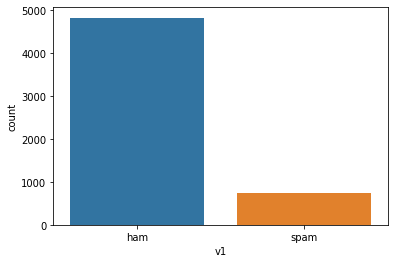

In [5]:
import seaborn as sns
sns.countplot(spam['v1'])

## Tokenizing


In [6]:
import nltk

In [8]:
# 예시 코드 코드
from nltk.tokenize import word_tokenize

nltk.download('punkt')
word_tokenize(spam.iloc[5]['v2'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'now',
 'and',
 'no',
 'word',
 'back',
 '!',
 'I',
 "'d",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still',
 '?',
 'Tb',
 'ok',
 '!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send',
 ',',
 'å£1.50',
 'to',
 'rcv']

In [34]:
tokenized = []


for i in range(len(spam)):
  isSpam = spam.iloc[i,0]
  text = spam.iloc[i,1]
  tokens = word_tokenize(text)
  tokenized.append(tokens)

In [44]:
print(max(len(tokens) for tokens in tokenized))

220


## Embedding

- 수업에서 다룬 임베딩 방법에는 One-hot encoding, CBOW, Skip-gram, GloVe, FastText가 있었습니다. 다양한 시도와 '비교' 결과를 함께 적어주세요! 파라미터를 조정해가는 과정도 해석에 도움이 될 수 있겠죠 :)

In [40]:
!pip install glove_python_binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.9/974.9 KB 19.1 MB/s eta 0:00:00


In [68]:
from gensim.models import Word2Vec
from glove import Corpus, Glove
from gensim.models import FastText

cbow = Word2Vec(sentences=tokenized, size=100, window=5, min_count=5, workers=4, sg=0)

skipGram = Word2Vec(sentences=tokenized, size=100, window=5, min_count=5, workers=4, sg=1)

corpus = Corpus()
corpus.fit(tokenized, window=5)
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

fastText = FastText(tokenized, size=100, window=5, min_count=5, workers=4, sg=1)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


## 본인이 도출해낸 해석을 적어주세요!

- 유사도, Wordcloud, 이진 분류 모델, Plot 뭐든 상관없으니 분명하고 인상적인 해석을 적어주시면 됩니다.

In [65]:
cbow.wv.most_similar('free')

[('stop', 0.9717459678649902),
 ('reply', 0.9703882336616516),
 ('08000930705', 0.969640851020813),
 ('texts', 0.956732988357544),
 ('Reply', 0.9548654556274414),
 ('camcorder', 0.9492486715316772),
 ('network', 0.9484249353408813),
 ('Camcorder', 0.9425432085990906),
 ('code', 0.9411534667015076),
 ('3030', 0.940963625907898)]

In [66]:
skipGram.wv.most_similar('free')

[('stop', 0.9717459678649902),
 ('reply', 0.9703882336616516),
 ('08000930705', 0.969640851020813),
 ('texts', 0.956732988357544),
 ('Reply', 0.9548654556274414),
 ('camcorder', 0.9492486715316772),
 ('network', 0.9484249353408813),
 ('Camcorder', 0.9425432085990906),
 ('code', 0.9411534667015076),
 ('3030', 0.940963625907898)]

In [67]:
glove.most_similar('free')

[('cash-in', 0.9799388914096144),
 ('08000930705', 0.9754845304793859),
 ('over', 0.973058470168239),
 ('them', 0.9719480944092603)]

In [69]:
fastText.most_similar('free')

<ipython-input-69-82e25f211653>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  fastText.most_similar('free')


[('reply', 0.9593857526779175),
 ('Reply', 0.9471750259399414),
 ('08000930705', 0.9471588730812073),
 ('08707509020', 0.9466478824615479),
 ('poly', 0.9456518888473511),
 ('texts', 0.9446025490760803),
 ('tone', 0.9446019530296326),
 ('camcorder', 0.9428223371505737),
 ('spree', 0.9425583481788635),
 ('10', 0.9402723908424377)]